In [8]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128
import sim

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [21]:
 def plot_vector_field(ax=plt, fmax = 0.6):
    X, Y = np.meshgrid(np.arange(-10, 10, .3), np.arange(-10, 10, .3))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

ffff

In [27]:
# Goal
goal = [-7.425, -7.295, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[7.27, -7.75, .07], # Cylinder12
             [2.8, -4.85, .01], # Cylinder7
             [-5.8, -0.975, 1], # Cylinder11 1
             [4.4, 0.875, .01], # Cylinder6
             [2.42, 4.075, 1], # Cylinder5 1
             [0.52, 6.3, .001], # Cylinder8 1
             [-1.775, 2.1, 1], # Cylinder10 1
             [-5.12, 3.42, .02], # Cylinder9 1
             [7.425, 4.725, 2], # Cuboid1
             [2.725, 0.0, 2.5], # Cuboid0
             [-1.025,  -1.5, 2], # Cuboid3
             [-6.7, 6.4, 0.1], # Cuboid4
             [-5.15, -6.2, 0.7], # Cuboid6
              ]

[[ 7.06623444  8.02598554]
 [ 6.51691866  7.56079837]
 [ 5.95988755  7.15174074]
 [ 5.38758209  6.77077322]
 [ 4.82117069  6.38452744]
 [ 4.29565006  5.99086125]
 [ 3.84110064  5.62063177]
 [ 3.49402858  5.33355769]
 [ 3.30835737  5.22336596]
 [ 3.24441893  5.28997115]
 [ 3.14219089  5.35918905]
 [ 3.00115242  5.44631905]
 [ 2.80247374  5.54098319]
 [ 2.52938957  5.63019571]
 [ 2.16889807  5.68657115]
 [ 1.72454874  5.67291818]
 [ 1.22616416  5.55718661]
 [ 0.72194139  5.3342482 ]
 [ 0.25211521  5.03232514]
 [-0.16309255  4.69532793]
 [-0.52027494  4.36249746]
 [-0.8220257   4.06838092]
 [-1.07015865  3.84863184]
 [-1.27151078  3.73600765]
 [-1.45270908  3.72666163]
 [-1.65175504  3.76338509]
 [-1.88835124  3.79673118]
 [-2.16634225  3.80416052]
 [-2.48214948  3.77042893]
 [-2.82545859  3.68329061]
 [-3.17999284  3.53629105]
 [-3.5267782   3.33149139]
 [-3.84864233  3.0787441 ]
 [-4.13423375  2.79071754]
 [-4.38400809  2.47901451]
 [-4.60889936  2.16160306]
 [-4.81157154  1.8591988 ]
 

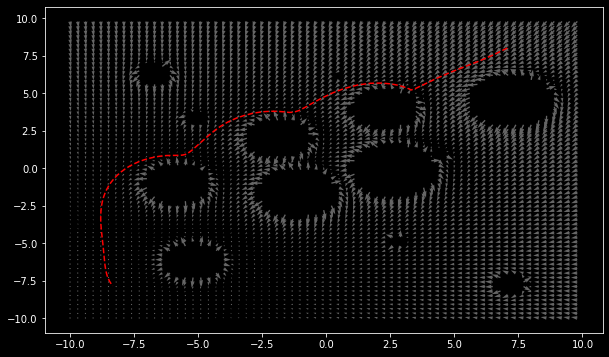

In [28]:
# Initial location of the robot
q = np.array((7.625, 8.55))


trajectory = simulate(q, goal, obstacles)

print(trajectory)

plot(trajectory[:,0], trajectory[:,1], 'r--')
plot_vector_field()

In [29]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [30]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  63500
Omnirob is at [x,y,z]= [7.624996185302734, 8.544999122619629, 0.35449904203414917]
Disconnected


In [ ]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

desired_position = r.get_object_position('Sphere1')
print('Desired position: (%.2f, %.2f) '%(desired_position[0], desired_position[1]))

relative_position = r.get_object_relative_position('Sphere1')
print('Relative position: (%.2f, %.2f) '%(relative_position[0], relative_position[1]))


# Virtual disk - add a 1 unit disk with minimal density and collision off
disk = robot('Disc', client_id=r.client_id)


# Time duration
# tf = 5
# Time interval
time_steps = 5
###
# These arrays contain the 3rd degree polynomial coefficients at each step,
# based on the spline trajectory calculated from the given "trajectories.ipynb"
# from class / GitHub repository.
#
# They are stored as tuples, where the first element is the coefficient for the trajectory in the X direction,
# and the second element is the coefficient for the trajectory in the Y direction.
###
a0 = np.array(trajectory)
#a1 = np.array(vlist)

waypoints = len(trajectory)

for i in range(waypoints):
    for t in range(time_steps):
        x_traj = a0[i][0] #+ (a1[i][0] * t) 
        y_traj = a0[i][1] #+ (a1[i][1] * t) 
        #x_vel = a1[i][0]
       # y_vel = a1[i][1]

        disk.set_position([x_traj, y_traj, -1])


        # Sensing
        robot_position = r.get_position()


        # Trajectory tracker
        u = 5 * ((x_traj, y_traj, 0) - robot_position) #+ [x_vel, y_vel, 0]

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

        time.sleep(0.02)


r.close_connection() 

Robot connected
Robot position: (7.62, 8.55) 
Desired position: (3.22, -2.60) 
Relative position: (-4.41, -11.14) 
Robot connected
